<a href="https://www.kaggle.com/code/apttemi/fork-of-predicting-diabetes-outcome?scriptVersionId=132242523" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


Updating the first version to edit the values with '0'

# This work is aimed at predicting diabetes outcome using Logistic regression

Tasks to be completed:
* Perform EDA (data info, description and head)
* check for duplicates
* check for outliers
* test for normality
* check the distribution of the outcome variable
* plot the distribution of each variable by outcome
* perform logistic regression on the dataset and visualize the plot

# Load the dataset and perform EDA

In [2]:
#read the file
data = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [3]:
#data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#data description
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
#data head
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.shape

(768, 9)

In [7]:
#check for duplicates
duplicates = data.duplicated()
if duplicates.any():
    print("Duplicates found!")
    duplicate_rows = data[duplicates]
    print(duplicate_rows)
else:
    print("No duplicates found!")

No duplicates found!


option 1: Replace 0 with NaNs then drop all the NaNs. Option 2 is to replace all 0s with the mean

In [8]:
data.drop(data[(data['Pregnancies'] == 0)].index, inplace=True)
data.drop(data[(data['Glucose'] == 0)].index, inplace=True)
data.drop(data[(data['BloodPressure'] == 0)].index, inplace=True)
data.drop(data[(data['SkinThickness'] == 0)].index, inplace=True)
data.drop(data[(data['BMI'] == 0)].index, inplace=True)
data.drop(data[(data['DiabetesPedigreeFunction'] == 0)].index, inplace=True)
data.drop(data[(data['Age'] == 0)].index, inplace=True)
data.drop(data[(data['Insulin'] == 0)].index, inplace=True)
#data['Pregnancies'] = data['Pregnancies'].replace(0,np.nan)
#data['Glucose'] = data['Glucose'].replace(0,np.nan)
#data['BloodPressure'] = data['BloodPressure'].replace(0,np.nan)
#data['SkinThickness'] = data['SkinThickness'].replace(0,np.nan)
#data['BMI'] = data['BMI'].replace(0,np.nan)
#data['DiabetesPedigreeFunction'] = data['DiabetesPedigreeFunction'].replace(0,np.nan)
#data['Age'] = data['Age'].replace(0,np.nan)

In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1


In [10]:
#data info for the new dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               336 non-null    int64  
 1   Glucose                   336 non-null    int64  
 2   BloodPressure             336 non-null    int64  
 3   SkinThickness             336 non-null    int64  
 4   Insulin                   336 non-null    int64  
 5   BMI                       336 non-null    float64
 6   DiabetesPedigreeFunction  336 non-null    float64
 7   Age                       336 non-null    int64  
 8   Outcome                   336 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 26.2 KB


In [11]:
#data head
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1


In [12]:
#get the feature variables
features_variables = data.iloc[:, 0:8]
#get the outcome variables
outcome_variable = data.iloc[:, -1]

In [13]:
print("Feature variables")
features_variables

Feature variables


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89,66,23,94,28.1,0.167,21
6,3,78,50,32,88,31.0,0.248,26
8,2,197,70,45,543,30.5,0.158,53
13,1,189,60,23,846,30.1,0.398,59
14,5,166,72,19,175,25.8,0.587,51
...,...,...,...,...,...,...,...,...
751,1,121,78,39,74,39.0,0.261,28
755,1,128,88,39,110,36.5,1.057,37
760,2,88,58,26,16,28.4,0.766,22
763,10,101,76,48,180,32.9,0.171,63


In [14]:
print("Outcome variable")
outcome_variable

Outcome variable


3      0
6      1
8      1
13     1
14     1
      ..
751    0
755    1
760    0
763    0
765    0
Name: Outcome, Length: 336, dtype: int64

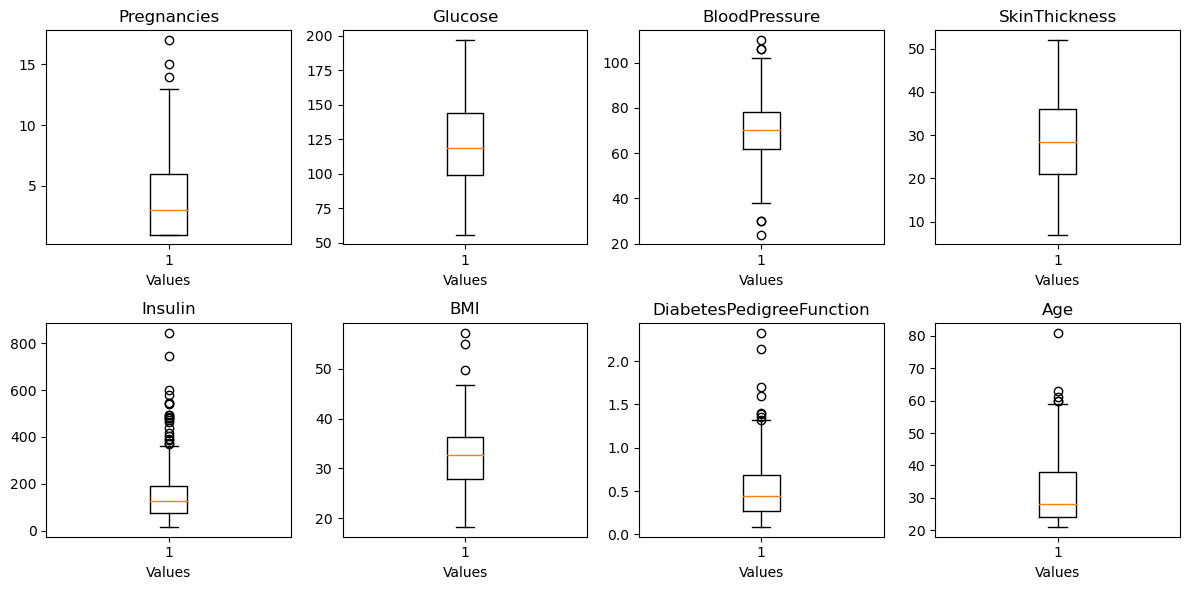

In [15]:
#plot the variables to check for outliers
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

# Flatten the axs array to simplify indexing
axs = axs.flatten()

for i, feature in enumerate(features_variables.columns):
    axs[i].boxplot(features_variables[feature])
    axs[i].set_title(feature)
    axs[i].set_xlabel('Values')

# Remove any unused subplots
for j in range(len(features_variables.columns), len(axs)):
    fig.delaxes(axs[j])

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

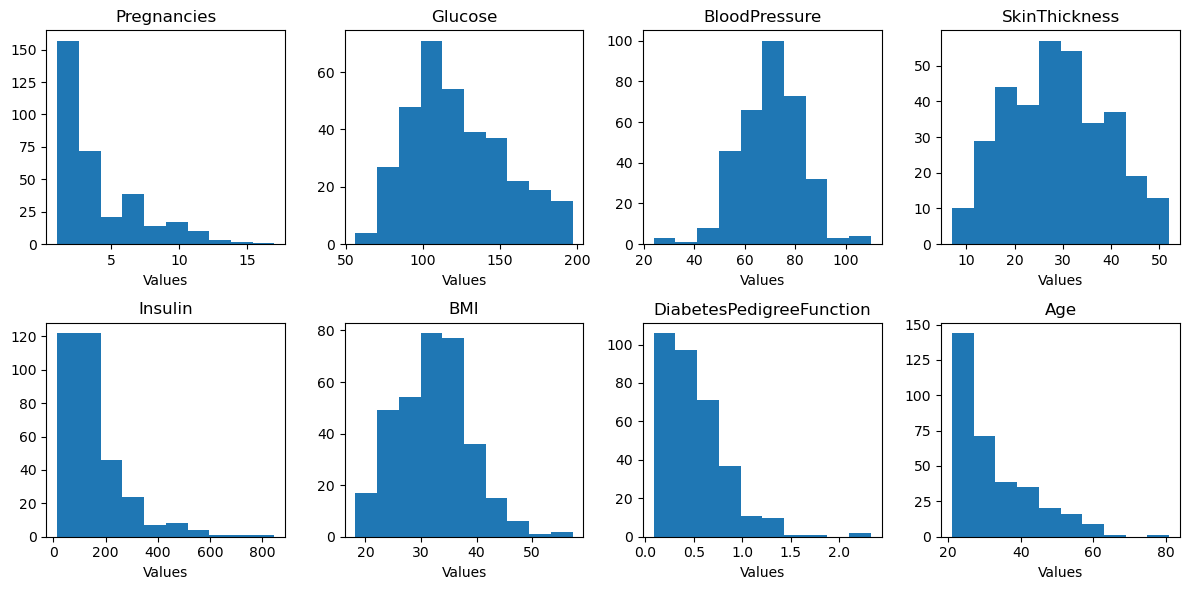

In [16]:
#plot the variables to test for normality
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

# Flatten the axs array to simplify indexing
axs = axs.flatten()

for i, feature in enumerate(features_variables.columns):
    axs[i].hist(features_variables[feature])
    axs[i].set_title(feature)
    axs[i].set_xlabel('Values')

# Remove any unused subplots
for j in range(len(features_variables.columns), len(axs)):
    fig.delaxes(axs[j])

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

In [17]:
#use shpairo-wilk test to test for normality

alpha = 0.05 #set significance level
for column in features_variables.columns:
    column_data = features_variables[column]
    statistic, p_value = shapiro(column_data)
    #print the test result for the current column
    print("Column:", column)
    print("Statistic:", statistic)
    print("p_value:", p_value)
    
    #check for normality per column
    if (p_value < alpha):
        print("The data does not follow normal distribution")
    else:
        print("The data follows normal distribution")
    print()

Column: Pregnancies
Statistic: 0.8367506265640259
p_value: 3.5392233589352186e-18
The data does not follow normal distribution

Column: Glucose
Statistic: 0.9668552279472351
p_value: 6.150559670459188e-07
The data does not follow normal distribution

Column: BloodPressure
Statistic: 0.9884556531906128
p_value: 0.00909904669970274
The data does not follow normal distribution

Column: SkinThickness
Statistic: 0.9842665791511536
p_value: 0.0009932828834280372
The data does not follow normal distribution

Column: Insulin
Statistic: 0.8037979602813721
p_value: 7.309498451333323e-20
The data does not follow normal distribution

Column: BMI
Statistic: 0.9875507354736328
p_value: 0.00554784806445241
The data does not follow normal distribution

Column: DiabetesPedigreeFunction
Statistic: 0.8835572004318237
p_value: 2.7219941625938448e-15
The data does not follow normal distribution

Column: Age
Statistic: 0.8629738092422485
p_value: 1.1983286124716907e-16
The data does not follow normal distri

Discussion on test for normality: From the test and histogram, none of the variables follow a normal distribution

<Axes: xlabel='Outcome', ylabel='count'>

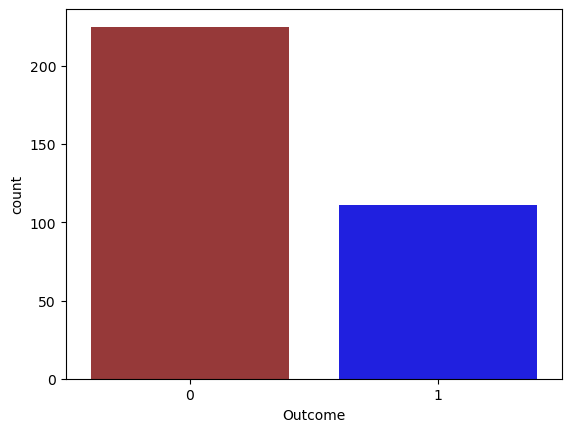

In [18]:
#plot the distribution of the outcome column

sns.countplot(x = outcome_variable, data = data, palette=['brown', 'blue'])

There are more negative outcomes than there are positive outcomes

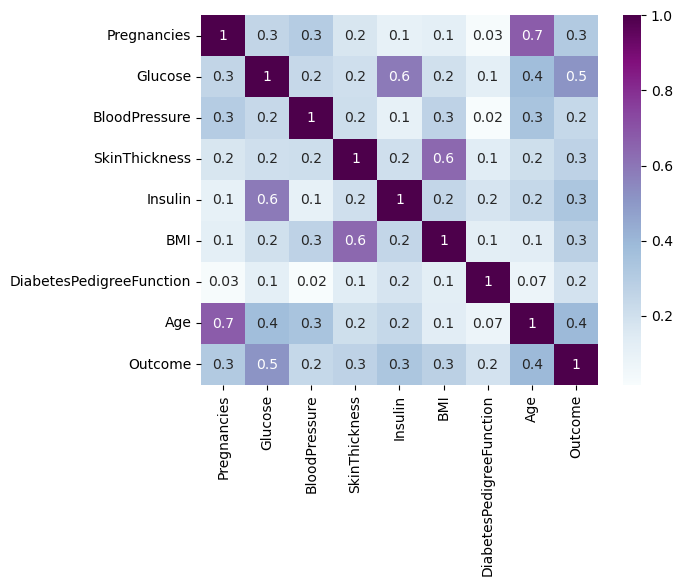

In [19]:
#check the correlation between the variables
column_corr = data.corr()
heatmap = sns.heatmap(column_corr, annot=True, cmap="BuPu", fmt='.1g')

Discussion of correlation:
* There is a high positive linear relationship between age and pregnancies
* There is a moderate positive linear relationship between Glucose and outcome and Glucose and Insulin

# Logistic regression

In [20]:
#get the feature variables
X = data.iloc[:, 0:8]
#get the outcome variables
y = data.iloc[:, -1]

In [21]:
X.shape

(336, 8)

In [22]:
X[:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89,66,23,94,28.1,0.167,21
6,3,78,50,32,88,31.0,0.248,26
8,2,197,70,45,543,30.5,0.158,53
13,1,189,60,23,846,30.1,0.398,59
14,5,166,72,19,175,25.8,0.587,51


In [23]:
# build the model
X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

pipe = make_pipeline(StandardScaler(), LogisticRegression())

# apply scaling on training data
pipe.fit(X_train, y_train) 

# apply scaling on testing data, without leaking training data.
pipe.score(X_test, y_test)  

0.9

In [24]:
X.shape

(100, 20)

In [25]:
 # testing a prediction on the trained model
y_pred = pipe.predict(X_test)

In [26]:
 # testing a prediction on the trained model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9


In [27]:
 # evaluate the model using confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

array([[4, 0],
       [1, 5]])

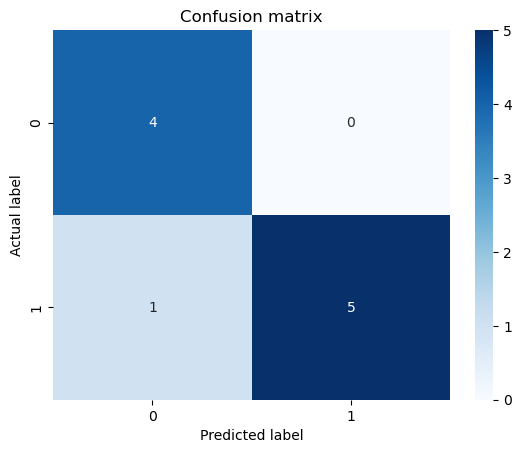

In [28]:
# Plot confusion matrix in a beautiful manner

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(cm, annot=True, cmap="Blues" ,fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.show()

Discussing the confusion matrix:
Correctly classified positive diabates outcome for 4 out of 4 samples. 
Correctly classified negative diabetes outcome for 1 out of 6 samples.
1 negative outcome was wrongly classified classified as positive.
No positive outcome was wrongly classified as positive.


In [29]:
# evaluate the confusion matrix using classification report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.80      1.00      0.89         4
   with diabetes       1.00      0.83      0.91         6

        accuracy                           0.90        10
       macro avg       0.90      0.92      0.90        10
    weighted avg       0.92      0.90      0.90        10



Discussing the classification report: 
The accuracy is good at 90%.
Overall, the classification report shows that the model performs well, with high precision, recall, and F1-score values for both classes, indicating a good ability to distinguish between the "with diabetes" and "without diabetes" classes. The high accuracy and consistent performance across metrics suggest that the model is reliable for this classification task.

# References

Code for Confusion matrix: https://thatascience.com/learn-machine-learning/confusion-matrix/

Code for data preprocessing and logistic regression: https://scikit-learn.org/stable/modules/preprocessing.html

Code for decision matrix: https://www.datacamp.com/tutorial/understanding-logistic-regression-python?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720827&utm_adgroupid=143216588617&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=657040116639&utm_targetid=dsa-1947282172981&utm_loc_interest_ms=&utm_loc_physical_ms=9046400&utm_content=dsa~page~community-tuto&utm_campaign=230119_1-sea~dsa~tutorials_2-b2c_3-uk_4-prc_5-na_6-na_7-le_8-pdsh-go_9-na_10-na_11-na-mayftyc23&gclid=CjwKCAjwg-GjBhBnEiwAMUvNWwQKKpWr3MTxY5kOjL951XSuByOf3GWV4wjwuTRUs1ysu-ukCo1tdRoC-JYQAvD_BwE